1. Data Import
2. Verification
3. Cleaning
4. Exploration
5. Standardization
6. Machine Learning
7. Prediction
8. Real Time Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine = pd.read_csv('winequalityN.csv')

In [70]:
pred_test = wine.iloc[2]
pred_test

type                     white
fixed acidity              8.1
volatile acidity          0.28
citric acid                0.4
residual sugar             6.9
chlorides                 0.05
free sulfur dioxide       30.0
total sulfur dioxide      97.0
density                 0.9951
pH                        3.26
sulphates                 0.44
alcohol                   10.1
quality                      6
Name: 2, dtype: object

In [82]:
pred_test['type'] = 1
pred_test.drop(['quality', 'total sulfur dioxide'])
type(pred_test)

pandas.core.series.Series

In [4]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
wine.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
wine.shape

(6497, 13)

In [9]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [14]:
#dropping null values
wine.dropna(inplace=True)
#we can use  "wine.update(wine.fillna(wine.mean()))" to fill the rest with mean value.

In [13]:
wine.shape

(6463, 13)

In [15]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
#finding number of red and white wines
wine['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [18]:
#in percentage
wine['type'].value_counts(normalize=True)

white    0.75352
red      0.24648
Name: type, dtype: float64

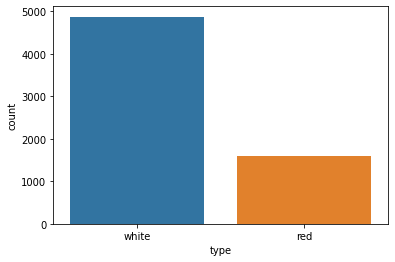

In [20]:
#plot form using seaborn
sns.countplot(x = "type", data = wine)

In [21]:
wine['quality'].value_counts(normalize=True)

6    0.436330
5    0.329259
7    0.166177
4    0.033112
8    0.029708
3    0.004642
9    0.000774
Name: quality, dtype: float64

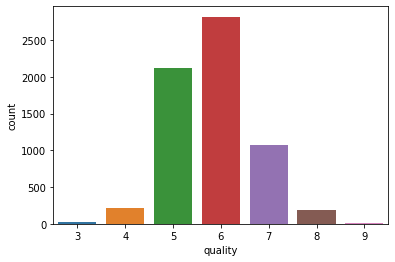

In [24]:
sns.countplot(x="quality", data=wine)

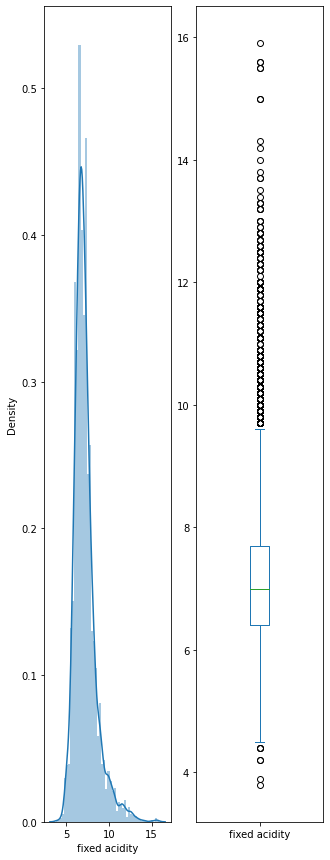

In [25]:
#univariate analysis
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['fixed acidity'])
plt.subplot(122)
wine['fixed acidity'].plot.box(figsize = {15,5})

In [26]:
#do this distribution for each variable later. (univariate analysis)

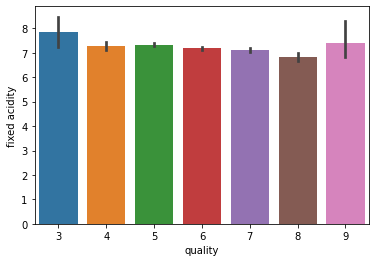

In [29]:
#plot of quality vs fixed acidity.
sns.barplot(x='quality',y='fixed acidity', data = wine)

In [30]:
#do this for all variables with first variable as quality. 8 and 9 can be classed as goood quality.

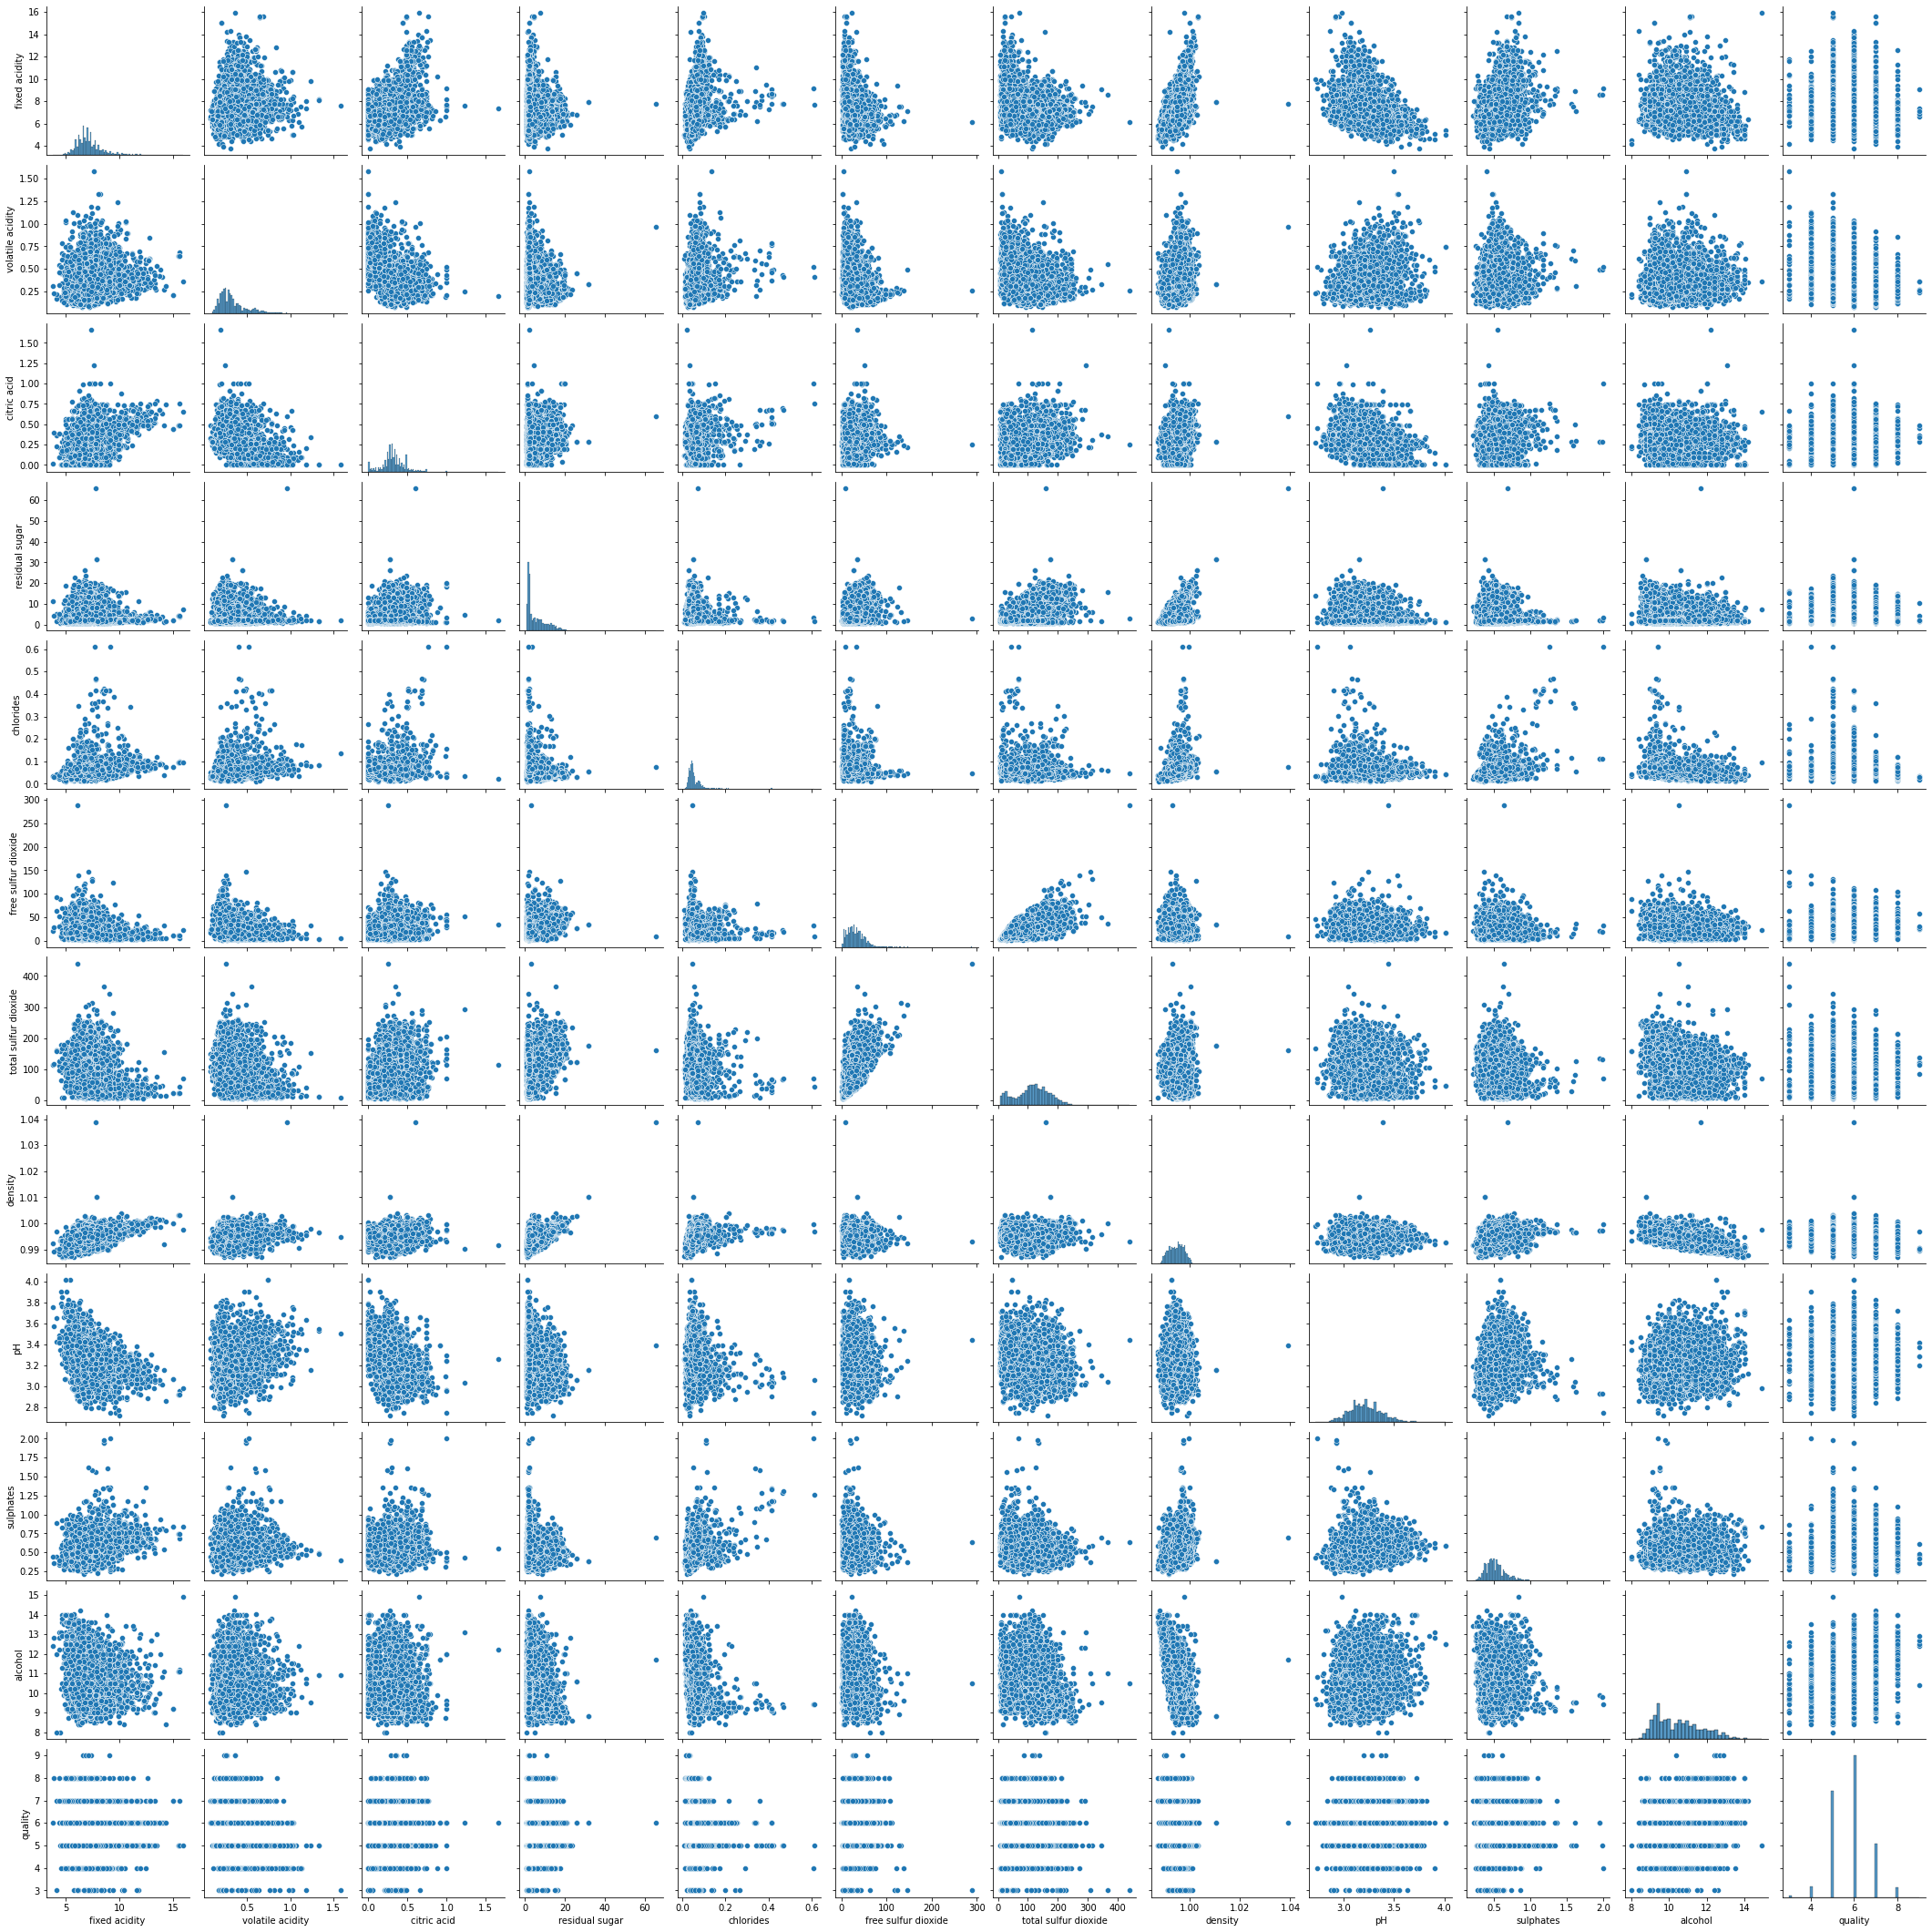

In [32]:
#we can do this using sns.pairplot()
sns.pairplot(wine)

In [33]:
#check each and every variable's correlation
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598
density,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.260019,0.190864,1.000000,-0.004116,0.039054


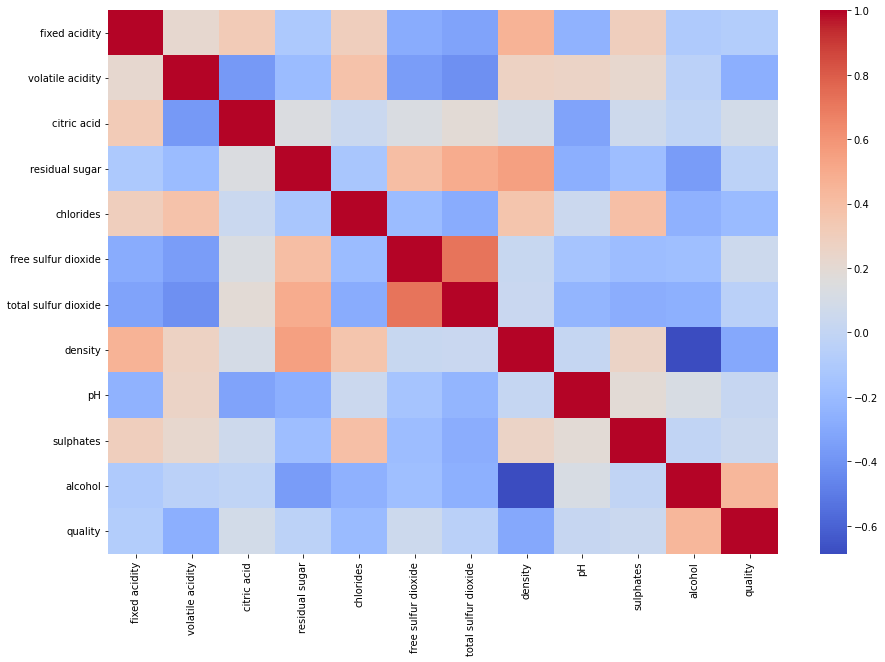

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(),cmap='coolwarm')

In [42]:
#we drop the columns which have high positive correlation and high negative correlation
wine_new = wine.drop('total sulfur dioxide', axis = 1)
wine_new.shape

(6463, 12)

In [43]:
wine_ml = pd.get_dummies(wine_new, drop_first = True)

In [44]:
wine_ml.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [45]:
#checking for nulls
wine_ml.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
type_white             0
dtype: int64

In [46]:
#converting quality into binary form
Y = wine_ml['quality'].apply(lambda y: 1 if y>7 else 0)

In [49]:
#drop quality which is already stored in y variable
X = wine_ml.drop('quality', axis=1)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)
#fits x values into a range between -1 and 1

In [53]:
X = X_standard

In [54]:
#using training and testing
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 362)

In [56]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [57]:
Y_pred = lr.predict(X_test)

In [59]:
#accuracy metric for a model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(Y_test,Y_pred)

0.9791183294663574

In [60]:
print(classification_report(Y_test,Y_pred))
#read about precision, recall, f1-score, support, and know what they are

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1268
           1       0.00      0.00      0.00        25

    accuracy                           0.98      1293
   macro avg       0.49      0.50      0.49      1293
weighted avg       0.96      0.98      0.97      1293



In [61]:
print(confusion_matrix(Y_test,Y_pred))
#read about what it signifies

[[1266    2]
 [  25    0]]


In [62]:
#Machine Learning - XGBoost, Random Forest, decision tree as homework

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier();
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [66]:
rfc_pred = rfc.predict(X_test)

In [67]:
accuracy_score(Y_test, rfc_pred)

0.9876256767208044

In [68]:
rfc.feature_importances_

array([0.08240191, 0.10406481, 0.08047945, 0.11411976, 0.09262435,
       0.1104536 , 0.11498084, 0.09157446, 0.09772515, 0.10970931,
       0.00186637])

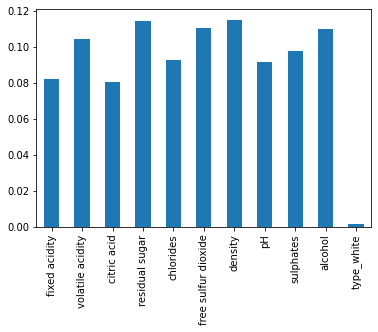

In [69]:
#contribution of variables to the model, which produces high and which produces less correlation
pd.Series(rfc.feature_importances_, index=wine_ml.drop('quality', axis=1).columns).plot(kind='bar')

In [78]:
#function for application - returning result for entered input
def application_test(pred_sample):
  if(pred_sample['type'] == 'white'):
    pred_sample['type'] = 1
  else:
    pred_sample['type'] = 0
  #pred_sample = pred_sample.drop(['quality', 'total sulfur dioxide'])
  pred_sample = np.array(pred_sample).reshape(1,-1)
  scaler.fit(pred_sample)
  pred_sample = scaler.transform(pred_sample)
  y_pred_sample = lr.predict(pred_sample)
  return y_pred_sample

In [79]:
application_test(wine.iloc[3])

array([0])

In [80]:
application_test(wine.iloc[572])

array([0])